Aula03 - Processamento de imagens com OpenCV em Python

Detecção de faces em imagens


Na aula de hoje vamos ver como utilizar técnicas de machine learning para detectar faces em imagens, que posteriormente poderão ser utilizadas para detectar faces também em vídeos.

O que há de mais moderno (estado da arte) atualmente para detecção de faces são as técnicas de “deep learning”, ou “aprendizado profundo” que envolvem algoritmos de inteligência artificial e redes neurais para treinar identificadores. 

Nessa aula, vamos utilizar uma técnica mais simples, mas que também é bastante eficiente, e rápida o suficiente para funcionar em smartphones atuais em tempo real. São os “haar-like cascades features” que foram usados no primeiro detector de rosto em tempo real. Essa técnica foi criada por Paul Viola e
Michael J. Jones no artigo 

"Rapid Object Detection using a Boosted Cascade of Simple Features" de 2001. O trabalho foi melhorado por posteriormente  Rainer Lienhart e Jochen Maydt em 2002 no trabalho "An Extended Set of Haar-like Features for Rapid Object Detection".

A principal vantagem da técnica é a baixa necessidade de processamento para realizar a identificação dos objetos, o que se traduz em alta velocidade de detecção.




##Carregando Dependências

Bibliotecas necessárias usadas neste exemplo: numpy, pandas, cv2, skimage, PIL, matplotlib

Numpy é uma biblioteca de manipulação de array, usada para álgebra linear, transformação de Fourier e capacidades de números aleatórios.

Pandas é uma biblioteca para manipulação e análise de dados.

CV2 é uma biblioteca para tarefas de visão computacional.

Skimage é uma biblioteca que oferece suporte a aplicativos de processamento de imagem em python.

Matplotlib é uma biblioteca que gera figuras e fornece um kit de ferramentas de interface gráfica com o usuário.



In [ ]:
# Aluna: Gabrielle Pedroso Azevedo Matrícula: 201910453 Curso: Sistemas de Informação

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import scipy

# !wget --no-check-certificate \
#     https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
#     -O common.py

##Passo 2: Ler a imagem de alguma url:

> Nesta etapa, vamos ler imagens de urls e exibi-las usando openCV.

Conforme vimos na nossa primeira aula prática,  observe a diferença ao ler imagens em formato RGB e BGR. Os canais de cores de entrada padrão estão no formato BGR ou RGB para openCV.

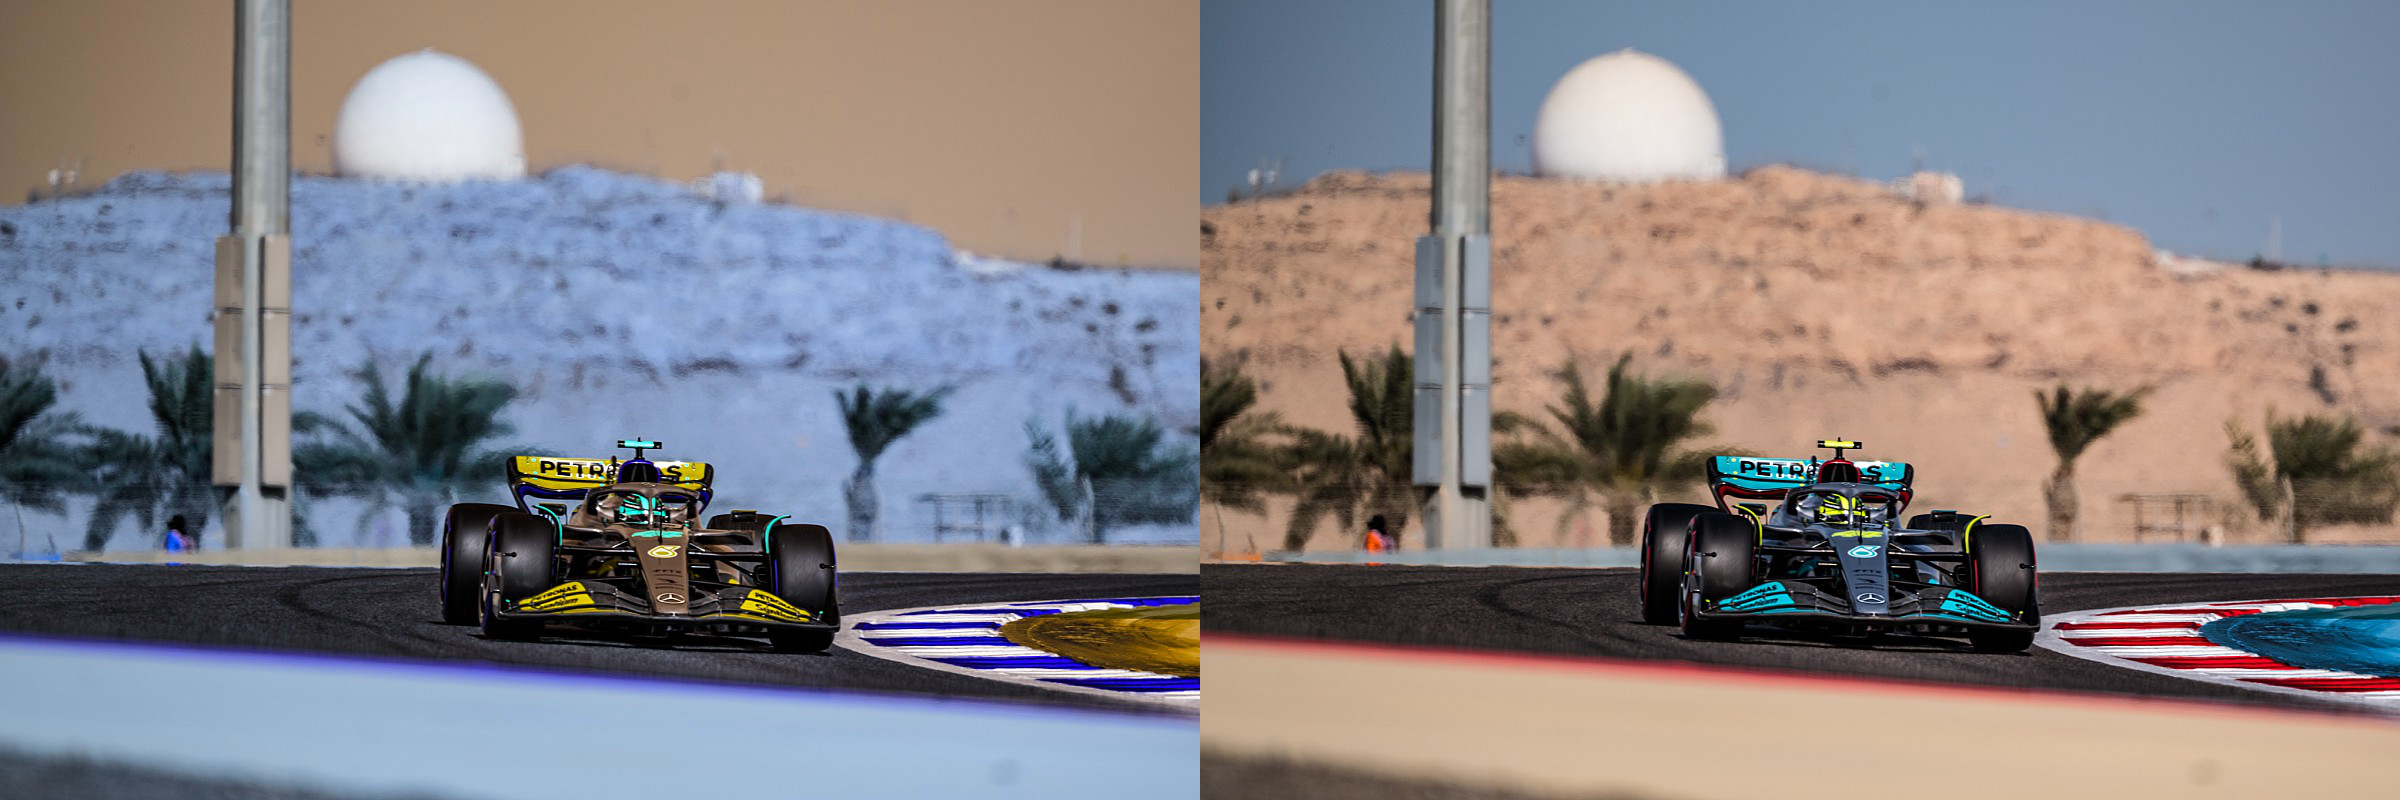

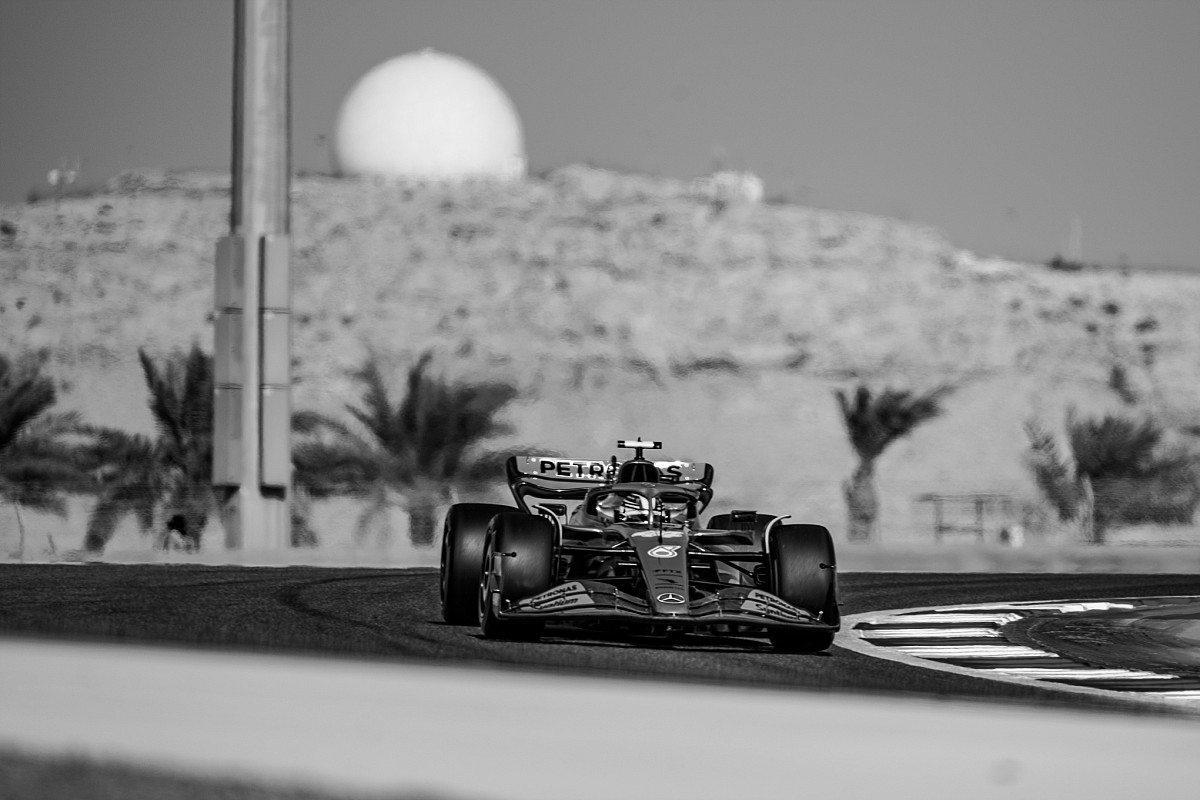

In [ ]:
# Criando uma lista de 3 urls de imagem que vamos ler posteriormente:
urls = ["https://cdn-1.motorsport.com/images/amp/254bdZn0/s6/lewis-hamilton-mercedes-w13-1.jpg"]

# Lendo e mostrando cada imagem da lista em BGR e RGB:
for url in urls:
  image = io.imread(url) 
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  
  final_frame = cv.hconcat((image, image_2)) 
  cv2_imshow(final_frame)

  print('\n')

  image_2_PB = cv.cvtColor( image_2, cv.COLOR_BGR2GRAY)
  cv2_imshow(image_2_PB)




 A principal vantagem dessa técnica é a baixa necessidade de processamento para realizar a identificação dos objetos, o que se traduz em alta velocidade de detecção.

Hoje vamos usar alguns detectores de objetos que já foram treinados, são de domínio público, e podem ser utilizados para detecção de vários tipos de objetos no OpenCV. Uma lista de detectores para vários tipos de objetos está disponível no github do openCV em:

github.com/opencv/opencv/tree/master/data/haarcascades 

Detectores Haar, assim como outras técnicas de visão computacional, são algoritmos que pode ser treinados para detectar tipos de objetos que possuem características em comum. Por exemplo, digamos queremos detectar faces humanas. 

É uma característica comum que entre todas as faces a região dos olhos é mais escura do que a região das bochechas. Portanto, uma característica Haar comum para a detecção de face é um conjunto de dois retângulos adjacentes que ficam na região dos olhos e acima da região das bochechas. A posição desses retângulos é definida em relação a uma janela de detecção que age como uma caixa delimitadora para o objeto alvo (a face, neste caso).



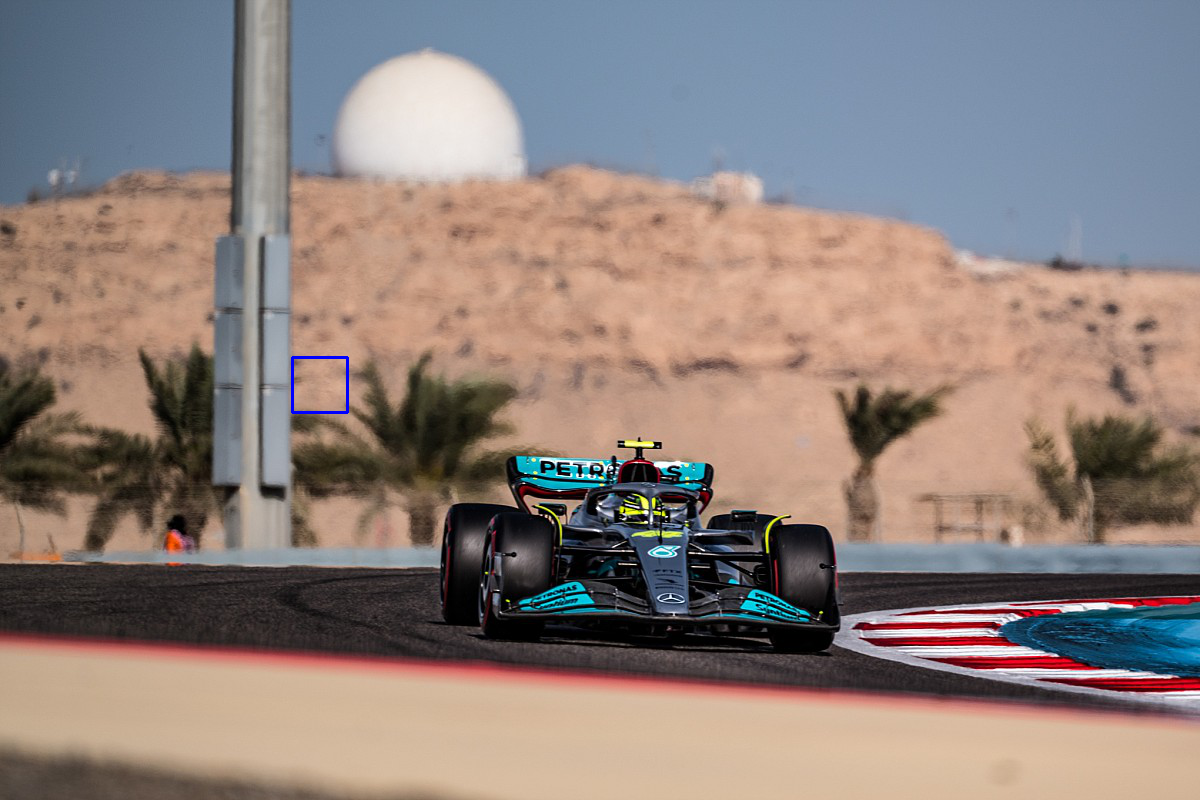

In [ ]:

# this is a pre-trained face cascade
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

# faces = face_cascade.detectMultiScale(image_2_PB, 1.3, 5)


#Executa a detecção das faces:
faces = face_cascade.detectMultiScale(image_2_PB, scaleFactor = 1.05, minNeighbors = 7, minSize = (30,30), flags = cv.CASCADE_SCALE_IMAGE)

# Desenha retangulos na iamgem original (colorida) para cada face encontrada:
for (x,y,w,h) in faces:
     cv.rectangle(image_2,(x,y),(x+w,y+h),(255,0,0),2)

cv2_imshow(image_2)


#### Exercício #1: Escolha uma imagem qualquer, carregue no seu colab, chame a função de detecção de faces, e veja o resultado.

Depois, modifique os parâmetros de uso da função "detectMultiScale" e verifique os resultados novamente. 

Image source examples:

[Google Image search](https://www.google.com/imghp?hl=en) - procure uma imagem. Clique com o botão esquerdo em uma das imagens retornadas, clique com o botão direito na imagem inteira e selecione "Copiar endereço da imagem".

Smile Detection
Vamos agora utilizar um outro modelo pré-treinado, de detecção de sorriso. 

Vamos repetir o códito, mas utilizando outro modelo, pré-treinado, "haarcascade_smile.xml" para detectar sorrisos nas imagens:

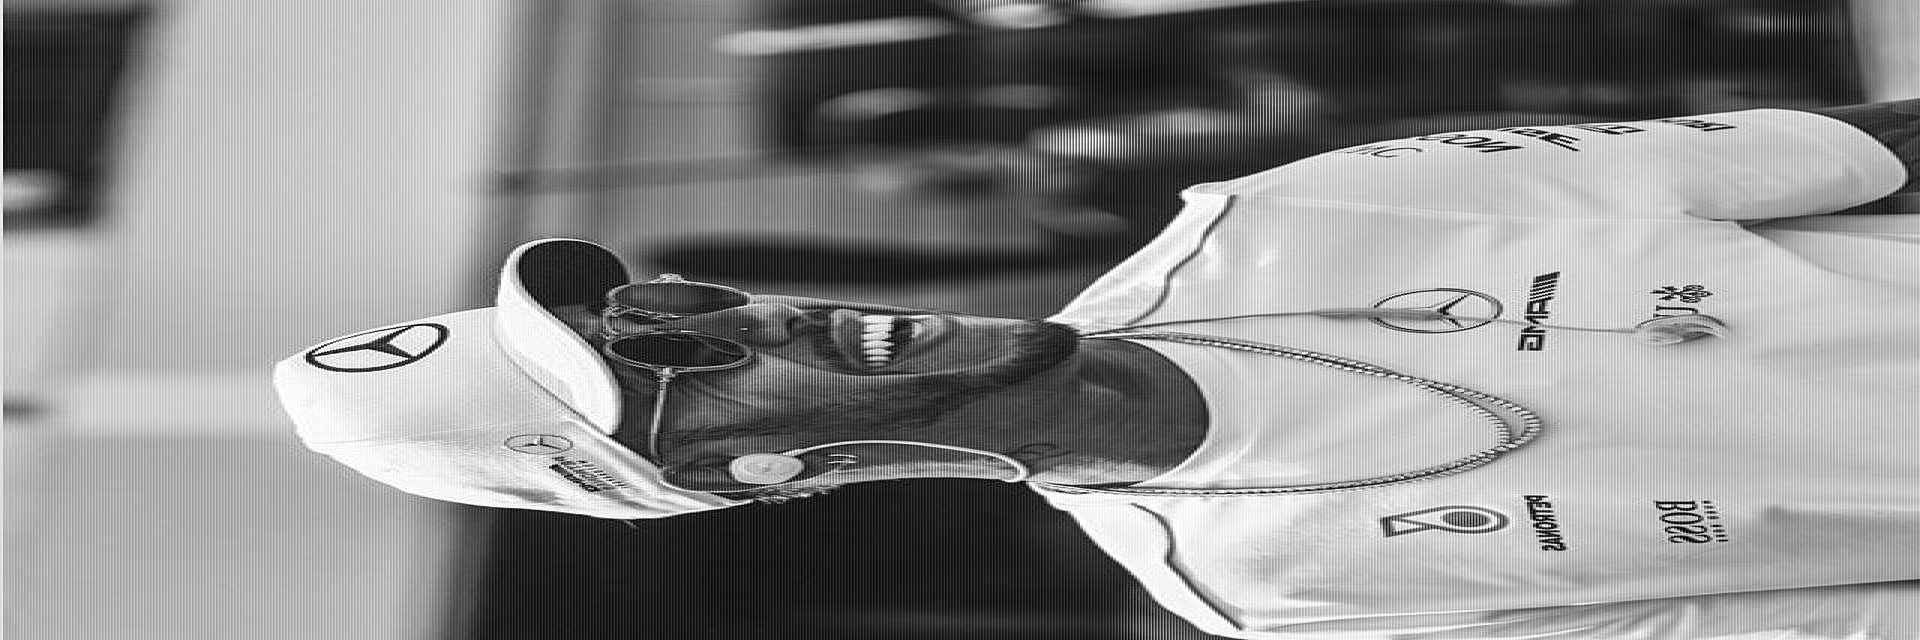

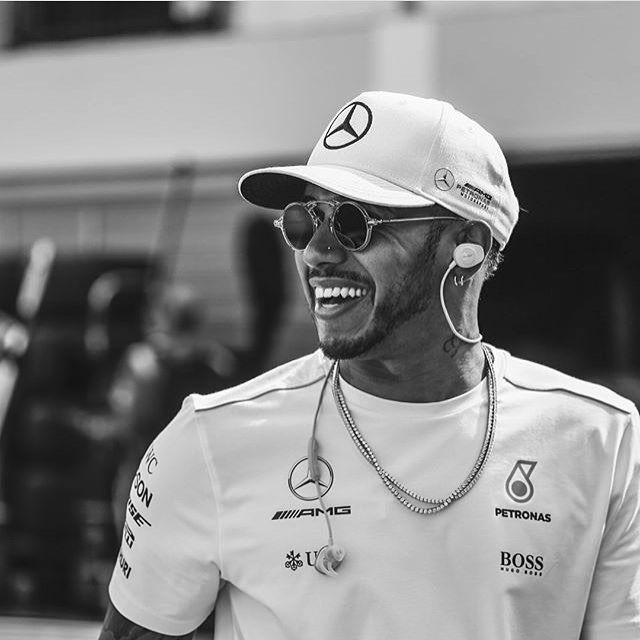

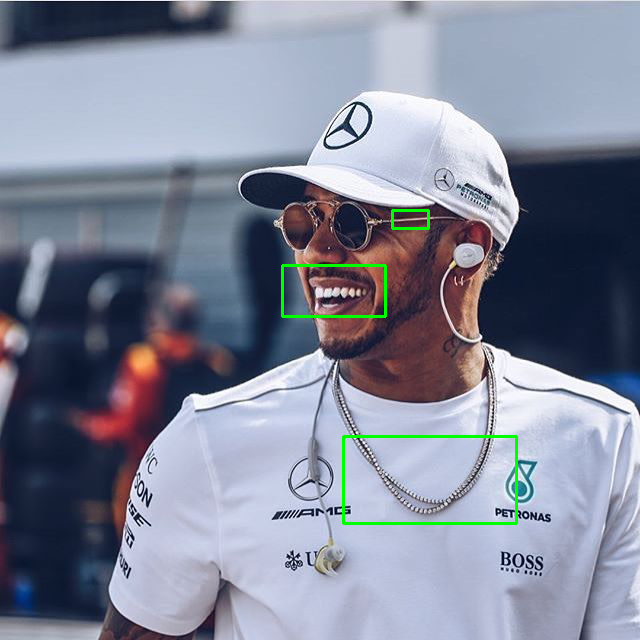

In [37]:
# Criando uma lista de urls de imagens de pessoas sorrindo que vamos utilizar posteriormente:
urls = ["https://i.pinimg.com/originals/f8/2b/47/f82b47c9ac81fca017a3aeb63c238308.jpg"]

# Lendo e mostrando cada imagem da lista em BGR e RGB:
for url in urls:
  image_s = io.imread(url) 
  image_s2 = cv.cvtColor(image_s, cv.COLOR_BGR2RGB)
  
  final_frame_s = cv.hconcat(image_s, image_s2) 
  cv2_imshow(final_frame_s)

  print('\n')

  image_s2_PB = cv.cvtColor( image_s2, cv.COLOR_BGR2GRAY)
  cv2_imshow(image_s2_PB)


# Carregando o modelo pré-treinado de detecção de sorrisos:
smile_cascade = cv.CascadeClassifier('haarcascade_smile.xml')
smiles = smile_cascade.detectMultiScale(image_s2_PB, 1.3, 20)
for (x,y,w,h) in smiles:
     cv.rectangle(image_s2,(x,y),(x+w,y+h),(0,255,0),2)

cv2_imshow(image_s2)
print('\n')


Exercício #2: Escolha uma imagem qualquer, carregue no seu colab, carregue o modelo de detecção de sorrisos, use na imagem carregada e veja o resultado.



Body detector. Por último, vamos utilizar um outro modelo pré-treinado, para  detecção de corpo das pessoas.

Vamos repetir o códito, mas utilizando outro modelo, pré-treinado, "haarcascade_smile.xml" para detectar sorrisos nas imagens. 

Você conseguiria fazer esse código sozinho? Vamos fazer como exercício!
